In [15]:
import numpy as np
import csv
import tensorflow as tf
from tqdm import tqdm_notebook
import pandas as pd
from keras.utils import np_utils
%matplotlib inline

## Create Training and Testing Datasets in CSV Format

In [16]:
import numpy as np

#encode data to binary with 10 bits
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10? 
        #number of bit for 1000 in binary is 10. Turning inputs into a vector of activations. 
        # converting to binary: We get more number of input neurons by converting to binary
        #>> moves binary bits of datainstance one to the right, & performs logical AND with binary of 1 and outputs binary
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    #returns an array of processed data in binaries of 10 bits
    return np.array(processedData)



In [17]:
# get data from .csv file and parse them 
#filename = filename.csv
def get_data(filename):
    with open(filename, 'r') as f:
        dat = csv.reader(f, delimiter = ',')
        #get column name from first row
        col_name = next(dat)
        #get all the rows as a list
        data = list(dat)
        #return data as numpy array
    return np.array(data)


#Processing Dataset # concatenation of paired up img_ids
# args: data: humanobserved-features , # pair: list of same or diff pairs. 
def process_data(data, pair, x):
    
    features = []
    target = []
    for i in range(len(pair)):
        for j in range(len(data)):
            if pair[i][x] == data[j][0]:
                f = (data[j][1:]) 
                features.append(f)
    
    return features

def getTarget(pair):
    return  np.array([pair[t][-1] for t in range(len(pair))]).astype(float)

(1026, 10)
[['0359a' '2' '1' '1' '0' '2' '2' '0' '2' '2']
 ['0577a' '2' '1' '1' '0' '2' '2' '0' '1' '2']
 ['1120a' '2' '1' '1' '3' '2' '2' '0' '2' '2']
 ['1120b' '1' '1' '1' '0' '2' '2' '0' '2' '2']
 ['1120c' '2' '1' '1' '0' '2' '2' '0' '0' '2']
 ['1121a' '2' '1' '1' '3' '2' '2' '0' '1' '2']
 ['1121b' '2' '1' '1' '0' '2' '2' '0' '3' '2']
 ['1121c' '1' '1' '1' '0' '2' '2' '0' '1' '2']
 ['1229b' '1' '1' '1' '3' '2' '2' '0' '2' '2']
 ['1302a' '2' '1' '1' '3' '2' '2' '0' '0' '2']]
['0359a' '0359b' '1']


In [ ]:
data = get_data('HumanObserved-Features-Data.csv')
dat = np.array([data[d][1:] for d in range(len(data))])
diff_pair = get_data('diffn_pairs.csv')
same_pair = get_data('same_pairs.csv')

print(dat.shape)
#print(d_pair.shape)
#print(s_pair.shape)
print(dat[:10])
print(same_pair[0])

In [ ]:
def getData(data, pair, operation):
    img1 = np.array(process_data(data, pair, x = 0)).astype(float)
    img2 = np.array(process_data(data, pair, x = 1)).astype(float)
    if operation == 'concatenate':
        feature = np.array(np.concatenate((img1, img2), axis = 1))
        
    elif operation =='subtract':
        feature = np.abs(np.array(img1 - img2))
        
    return feature

In [ ]:
# get target
Target_same = getTarget(same_pair)
Target_diff = getTarget(diff_pair)
print(Target_same.shape)
print(Target_diff.shape)

In [ ]:
# get concatenate and subtrated features for same and different pairs
same_sub = getData(dat, same_pair, operation = 'subtract')
same_conc = getData(dat, same_pair, operation = 'concatenate')
diff_sub = getData(dat, diff_pair, operation = 'subtract')
diff_conc = getData(dat, diff_pair, operation = 'concatenate')
print(same_sub[1])
print(same_conc[1])
print(diff_conc.shape)
print(diff_sub.shape)

In [ ]:
# add target to concatenated feature dataset
same_conc_t = np.c_[same_conc, Target_same]
diff_conc_t = np.c_[diff_conc, Target_diff]

diff_conc_t = np.array(diff_conc_t[:791])
print(same_conc_t.shape)
print(diff_conc_t.shape)


# add target to subtracted feature dataset
same_sub_t = np.c_[same_sub, Target_same]
diff_sub_t = np.c_[diff_sub, Target_diff]
diff_sub_t = np.array(diff_sub_t[:791])
print(same_sub_t.shape)
print(diff_sub_t.shape)


In [20]:
# Read Dataset using pandas


# get target
Target_same = getTarget(same_pair)
Target_diff = getTarget(diff_pair)
print(Target_same.shape)
print(Target_diff.shape)


same_conc = pd.read_csv('same_conc.csv', delimiter = ',', header = None).values
diff_conc  = pd.read_csv('diff_conc.csv', delimiter = ',', header = None).values


# add target to concatenated feature dataset
same_conc_t = np.c_[same_conc, Target_same]
diff_conc_t = np.c_[diff_conc, Target_diff]

diff_conc_t = np.array(diff_conc_t[:791])
print(same_conc_t.shape)
print(diff_conc_t.shape)

(791,)
(293032,)
(791, 19)
(791, 19)


In [257]:
#1. human observed feature concatenated # concatenate same and diff pairs matrices and shuffle them
h_obs_conc = np.concatenate((same_conc_t, diff_conc_t), axis = 0)
np.random.shuffle(h_obs_conc)  # randomly shuffle same and diff pairs

print(h_obs_conc.shape)
print(h_obs_conc[:2]) # print first five rows of the parsed data

Target_conc = h_obs_conc[:, -1]
print(Target_conc.shape)

#get concatenated matrix after shuffling diff and same pairs

feature_conc = h_obs_conc[:,:-1]  
print(feature_conc.shape)
t =int(0.9*len(feature_conc))
TrainingData = feature_conc[:t]
TestingData = feature_conc[t+1:]

TrainingTarget = np.array(Target_conc[:t])
TestingTarget = np.array(Target_conc[t+1:])

TrainingTarget = np.array([[i] for i in TrainingTarget])
TestingTarget = np.array([[i] for i in TestingTarget])

# print(TrainingData.shape)

# print(TestingData.shape)



(1582, 19)
[[2. 2. 1. 3. 2. 2. 0. 1. 1. 1. 1. 1. 0. 0. 3. 1. 2. 1. 1.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 0. 2. 2. 1. 0. 1. 0.]]
(1582,)
(1582, 18)


In [258]:
print(h_obs_conc[:10])
print(Target_conc[:10])
print(feature_conc[:10])
print(TrainingData[:10])
print(TrainingTarget[:10])

[[2. 2. 1. 3. 2. 2. 0. 1. 1. 1. 1. 1. 0. 0. 3. 1. 2. 1. 1.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 0. 2. 2. 1. 0. 1. 0.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 0. 2. 2. 3. 3. 2. 0.]
 [2. 1. 1. 3. 0. 2. 0. 1. 2. 1. 0. 1. 0. 2. 2. 0. 3. 2. 1.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 1. 2. 3. 1. 3. 2. 0.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 0. 2. 2. 3. 4. 2. 0.]
 [0. 0. 1. 3. 2. 2. 0. 0. 2. 1. 2. 1. 2. 2. 2. 1. 0. 1. 1.]
 [2. 0. 1. 0. 2. 1. 0. 0. 2. 2. 1. 1. 0. 2. 3. 1. 4. 2. 1.]
 [2. 1. 1. 0. 2. 2. 0. 1. 2. 0. 1. 1. 3. 2. 2. 0. 0. 2. 0.]
 [2. 1. 1. 0. 2. 2. 0. 1. 2. 0. 1. 1. 0. 2. 2. 1. 2. 2. 0.]]
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
[[2. 2. 1. 3. 2. 2. 0. 1. 1. 1. 1. 1. 0. 0. 3. 1. 2. 1.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 0. 2. 2. 1. 0. 1.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 0. 2. 2. 3. 3. 2.]
 [2. 1. 1. 3. 0. 2. 0. 1. 2. 1. 0. 1. 0. 2. 2. 0. 3. 2.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 1. 2. 3. 1. 3. 2.]
 [2. 1. 1. 0. 2. 2. 0. 2. 2. 2. 1. 1. 0. 2. 2. 3. 4. 2.]
 [0. 0. 1. 3. 2. 2. 0. 0.

## Tensorflow Model Definition

In [259]:
# Defining Placeholder
inputTensor  = tf.placeholder(tf.float32, [None, 18]) #for 10bit input vector activations
outputTensor = tf.placeholder(tf.float32, [None, 1])  #a bucket for 4 classes of output


In [260]:
#Neural Network model for 2 hidden layer is defined 

NUM_HIDDEN_NEURONS_LAYER_1 = 100
NUM_HIDDEN_NEURONS_LAYER_2 = 100


# hyperparameter. change from 0.1 to 1 for this project
LEARNING_RATE = 0.001

# Initializing the weights to Normal Distribution   (random values)
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))

# Initializing the input to hidden layer weights
input_hidden_weights1  = init_weights([18, NUM_HIDDEN_NEURONS_LAYER_1])    


#Initializing the input to hidden layer 2 weights
input_hidden_weights2  = init_weights([NUM_HIDDEN_NEURONS_LAYER_1, NUM_HIDDEN_NEURONS_LAYER_2])


# Initializing the hidden to output layer 2 weights
hidden_output_weights2 = init_weights([NUM_HIDDEN_NEURONS_LAYER_2, 1])


# Computing values at the hidden layer 1
#Relu is applied on te sum of the product of the inputtensor and input_hidden_weights;  
hidden_layer1 = tf.nn.relu(tf.matmul(inputTensor, input_hidden_weights1))  

#computing values at 2nd hiddend layer
hidden_layer2 = tf.nn.relu(tf.matmul(hidden_layer1, input_hidden_weights2))



# Computing values at the output layer
#output of hidden layer is fed as input for the output layer and it is multiplied with weights
output_layer = tf.matmul(hidden_layer2, hidden_output_weights2)


# Defining Error Function # cost function. we need to minimize it  
#softmax activation function for classification problem to compute probabilites for classes
#cross_entropy error function as used for this classifier problem which makes backpropagation math easier
error_function = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output_layer, labels=outputTensor))

# Defining Learning Algorithm and Training Parameters
# gradientdescent optimizer is used to minimize the error function. 
#set learning rate hyper parameter. determines the step of the gradient descent. 
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(error_function)  #optimizer, minimizing error

# Prediction Function # prediction will be the largest output
prediction = tf.round(tf.sigmoid(output_layer))
#prediction = output_layer


# Training the Model

In [272]:
NUM_OF_EPOCHS = 5000  #number of forward and backward propagation of the full training data
BATCH_SIZE = 100  #number of training data set in one forward and backward propagation 

training_accuracy = []
output = []

# A tensorflow session is set to run the tensorflow model graph above. 
with tf.Session() as sess:  
    
    # Set Global Variables ?
    #Initialize all the variables (weights) at once. 
    tf.global_variables_initializer().run()
    
    for epoch in tqdm_notebook(range(NUM_OF_EPOCHS)):
        
        #Shuffle the Training Dataset at each epoch
        p = np.random.permutation(range(len(TrainingData)))
        processedTrainingData  = TrainingData[p]
        processedTraininglabel = TrainingTarget[p]
        
        # Start batch training  
        for start in range(0, len(processedTrainingData), BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(training, feed_dict={inputTensor: processedTrainingData[start:end], 
                                          outputTensor: processedTraininglabel[start:end]})            
        # Training accuracy for an epoch 
        training_accuracy.append(np.mean((processedTraininglabel) ==
                                         sess.run(prediction, feed_dict={inputTensor: processedTrainingData,
                                                             outputTensor: processedTraininglabel})))
    # Testing : processedtesting data as input
    predictedTestTarget = sess.run(prediction, feed_dict={inputTensor: TestingData})
   # erroroutput = sess.run(error_function, feed_dict={inputTensor:processedTrainingData,
#                                                      outputTensor: processedTrainingLabel})

KeyboardInterrupt: 

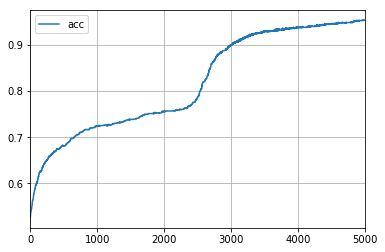

In [270]:
# pandas dataframe. plotting traning accuracy for every epochs. 
df = pd.DataFrame()
df['acc'] = training_accuracy
df.plot(grid=True)


# Testing the Model [Software 2.0]

In [271]:
# finding the accuracy by comparing with the known testing labels.

wrong   = 0
right   = 0

predictedTestTargetList = []

for i,j in zip(TestingTarget,predictedTestTarget):

    if i == j:
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
# testDataInput = testingData['input'].tolist()
# testDataLabel = testingData['label'].tolist()

# testDataInput.insert(0, "tenzinno")
# testDataLabel.insert(0, "50096989")

# testDataInput.insert(1, "tenzinno")
# testDataLabel.insert(1, "50096989")

# predictedTestLabelList.insert(0, "")
# predictedTestLabelList.insert(1, "")

# #create columns in pandas dataframe with column names input and label, with values test data and respective labels
# output = {}
# output["input"] = testDataInput
# output["label"] = testDataLabel

# # create column name predicted label with the predicted labels for the test data
# output["predicted_label"] = predictedTestLabelList

# # create a csv output file of the pandas dataframe
# opdf = pd.DataFrame(output)
# opdf.to_csv('output2.csv')

Errors: 6  Correct :152
Testing Accuracy: 96.20253164556962
